In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from collections import defaultdict, namedtuple, Counter
from itertools import combinations
import numpy as np
import scipy.stats as stats
import sys
from os import listdir
import json
import argparse
import random
import scipy.sparse as sparse
import statsmodels.api as sm

# Permutation Test

In [2]:
colors = ['#695d46ff', '#ce93d8ff', '#ef6c00ff', '#4db6acff']


In [7]:


permutation_results = '../permutation_tests/ancestry.0'
chroms0 = np.load('%s.chroms.npy' % permutation_results)
intervals0 = np.load('%s.intervals.npy' % permutation_results)
z0 = np.load('%s.npy' % permutation_results)[:, 2]
z0_mat = np.load('%s.npy' % permutation_results)[:, 0]
z0_pat = np.load('%s.npy' % permutation_results)[:, 1]
z0_is_mat_match = np.load('%s.is_mat_match.npy' % permutation_results)
z0_is_pat_match = np.load('%s.is_pat_match.npy' % permutation_results)

permutation_results = '../permutation_tests/ancestry.1'
chroms1 = np.load('%s.chroms.npy' % permutation_results)
intervals1 = np.load('%s.intervals.npy' % permutation_results)
z1 = np.load('%s.npy' % permutation_results)[:, 2]
z1_mat = np.load('%s.npy' % permutation_results)[:, 0]
z1_pat = np.load('%s.npy' % permutation_results)[:, 1]
z1_is_mat_match = np.load('%s.is_mat_match.npy' % permutation_results)
z1_is_pat_match = np.load('%s.is_pat_match.npy' % permutation_results)

#permutation_results = '../permutation_tests/spark.3'
#chroms3 = np.load('%s.chroms.npy' % permutation_results)
#intervals3 = np.load('%s.intervals.npy' % permutation_results)
#z3 = np.load('%s.npy' % permutation_results)[:, 2]
#z3_mat = np.load('%s.npy' % permutation_results)[:, 0]
#z3_pat = np.load('%s.npy' % permutation_results)[:, 1]

# 8,  8:115413633-122996100 facial expressions appropriate
# 9cross 8:6179970-7022283, 8:11662348-11813533,  0.004 use your hand like a tool
# 12cross 14:75675492-82342597, 0.022 special interests
# 14cross, 15:93581737-93638248, 0.029 mannerisms, odd hand or finger movements
# 25cross, 12:125882279-125883983, 0.035 eye contact
# 28cross, 19:1757733-2997899, 0.048 ever share
permutation_results = '../permutation_tests/ancestry.2'
chroms2 = np.load('%s.chroms.npy' % permutation_results)
intervals2 = np.load('%s.intervals.npy' % permutation_results)
z2 = np.load('%s.npy' % permutation_results)[:, 2]
z2_mat = np.load('%s.npy' % permutation_results)[:, 0]
z2_pat = np.load('%s.npy' % permutation_results)[:, 1]
z2_is_mat_match = np.load('%s.is_mat_match.npy' % permutation_results)
z2_is_pat_match = np.load('%s.is_pat_match.npy' % permutation_results)

#permutation_results = '../permutation_tests/mssng.2'
#z2_is_mat_match = np.load('%s.is_mat_match.npy' % permutation_results)
#z2_is_pat_match = np.load('%s.is_pat_match.npy' % permutation_results)

#permutation_results = '../permutation_tests/ihart.2.flip'
#chroms4 = np.load('%s.chroms.npy' % permutation_results)
#intervals4 = np.load('%s.intervals.npy' % permutation_results)
#z4 = np.load('%s.npy' % permutation_results)[:, 2]
#z4_mat = np.load('%s.npy' % permutation_results)[:, 0]
#z4_pat = np.load('%s.npy' % permutation_results)[:, 1]




#chrom, start_pos, end_pos = '17', 6764798, 6908210

#chrom, start_pos, end_pos = '20', 42752576, 44657537
#chrom, start_pos, end_pos = '20', 50984970, 51012181
#na = 1

#chrom, start_pos, end_pos = '19', 3604269, 3718439
#chrom, start_pos, end_pos = '7', 4101620, 4747462
chrom, start_pos, end_pos = '22', 18000000, 22000000
na = 1

print('chr%s:%d-%d, %d' % (chrom, start_pos, end_pos, na))
# mat


permutation_results = '../permutation_tests/ihart.ms2.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
z_anc = np.load('%s.npy' % permutation_results)
intervals = np.load('%s.intervals.npy' % permutation_results)
print(np.min(z_anc, axis=0))

permutation_results = '../permutation_tests/spark.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
z_anc_spark = np.load('%s.npy' % permutation_results)
intervals_spark = np.load('%s.intervals.npy' % permutation_results)
print(np.min(z_anc_spark, axis=0))

chrom, start_pos, end_pos = '22', 19500000, 21000000

#permutation_results = '../permutation_tests/ihart+spark.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
#z_anc_ancestry = np.load('%s.npy' % permutation_results)
#intervals_ancestry = np.load('%s.intervals.npy' % permutation_results)
#print(np.min(z_anc_ancestry, axis=0))
#
#permutation_results = '../permutation_tests/mssng.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
#z_anc = np.load('%s.npy' % permutation_results)
#intervals = np.load('%s.intervals.npy' % permutation_results)
#print(np.min(z_anc, axis=0))

#permutation_results = '../permutation_tests/mssng+spark.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
#z_anc = np.load('%s.npy' % permutation_results)
#print(np.min(z_anc, axis=0))

#
#permutation_results = '../permutation_tests/mssng+spark+ihart.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
#z_anc = np.load('%s.npy' % permutation_results)
#print(np.min(z_anc, axis=0))

#permutation_results = '../permutation_tests/ssc.hg38.chr%s.%d-%d.%d' % (chrom, start_pos, end_pos, na)
#z_anc = np.load('%s.npy' % permutation_results)
#print(np.min(z_anc, axis=0))


chr22:18000000-22000000, 1
[0.001 0.052 0.001 0.   ]
[0.639 0.441 0.511 0.   ]


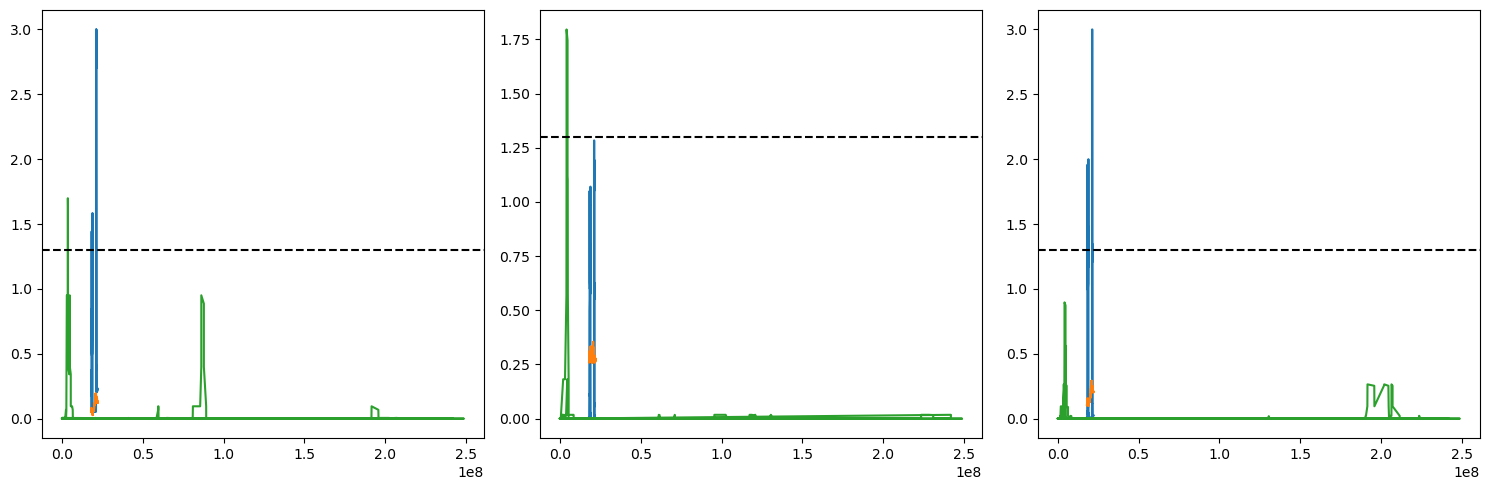

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(intervals[0, :], np.clip(-np.log10(z_anc[:, 0]), 0, 5))
plt.plot(intervals_spark[0, :], np.clip(-np.log10(z_anc_spark[:, 0]), 0, 5))
#plt.plot(intervals_ancestry[0, :], np.clip(-np.log10(z_anc_ancestry[:, 0]), 0, 5))
plt.plot(intervals2[0, :], np.clip(-np.log10(z2_mat), 0, 5))
plt.axhline(-np.log10(0.05), color='black', linestyle='--')

plt.subplot(1, 3, 2)
plt.plot(intervals[0, :], np.clip(-np.log10(z_anc[:, 1]), 0, 5))
plt.plot(intervals_spark[0, :], np.clip(-np.log10(z_anc_spark[:, 1]), 0, 5))
#plt.plot(intervals_ancestry[0, :], np.clip(-np.log10(z_anc_ancestry[:, 1]), 0, 5))
plt.plot(intervals2[0, :], np.clip(-np.log10(z2_pat), 0, 5))
plt.axhline(-np.log10(0.05), color='black', linestyle='--')

plt.subplot(1, 3, 3)
plt.plot(intervals[0, :], np.clip(-np.log10(z_anc[:, 2]), 0, 5))
plt.plot(intervals_spark[0, :], np.clip(-np.log10(z_anc_spark[:, 2]), 0, 5))
#plt.plot(intervals_ancestry[0, :], np.clip(-np.log10(z_anc_ancestry[:, 2]), 0, 5))
plt.plot(intervals2[0, :], np.clip(-np.log10(z2), 0, 5))
plt.axhline(-np.log10(0.05), color='black', linestyle='--')

plt.tight_layout()
plt.show()

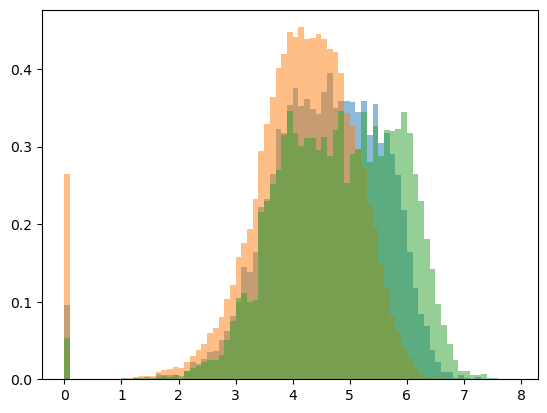

In [9]:
plt.hist(np.log10(intervals0[1, :]-intervals0[0, :]), 
         bins=np.arange(0, 8, 0.1), alpha=0.5, density=True)
plt.hist(np.log10(intervals1[1, :]-intervals1[0, :]), 
         bins=np.arange(0, 8, 0.1), alpha=0.5, density=True)
plt.hist(np.log10(intervals2[1, :]-intervals2[0, :]), 
         bins=np.arange(0, 8, 0.1), alpha=0.5, density=True)
plt.show()

In [10]:
with open('../data/chrom_lengths38.json', 'r') as f:
    chrom_lengths = json.load(f)
offset = np.zeros((24,), dtype=int)
for ch in range(1, 24):
    offset[(ch+1):] += chrom_lengths['X' if ch==23 else str(ch)]
x0 = np.array([offset[int(ch)]+p for ch, p in zip(chroms0, intervals0[0, :])])
x1 = np.array([offset[int(ch)]+p for ch, p in zip(chroms1, intervals1[0, :])])
x2 = np.array([offset[int(ch)]+p for ch, p in zip(chroms2, intervals2[0, :])])
#x3 = np.array([offset[int(ch)]+p for ch, p in zip(chroms3, intervals3[0, :])])
#x4 = np.array([offset[int(ch)]+p for ch, p in zip(chroms4, intervals4[0, :])])


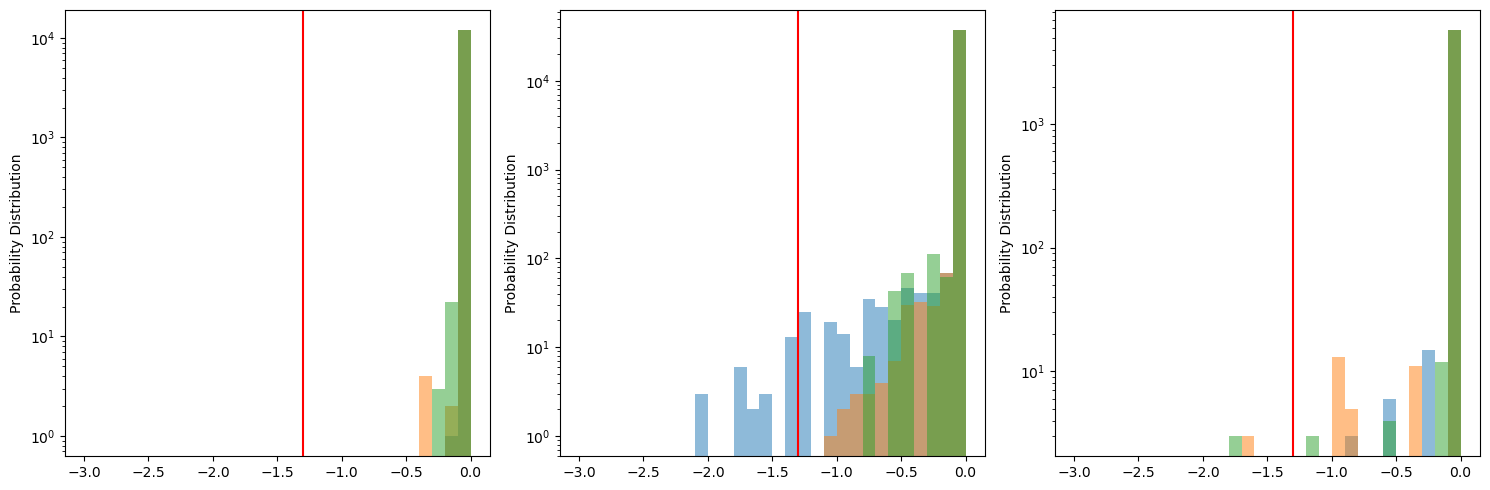

In [11]:
plt.figure(figsize=(15, 5))

bins = np.arange(-3, 0.1, 0.1)

plt.subplot(1, 3, 1)
plt.hist(np.clip(np.log10(z0), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z0_mat), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z0_pat), -3, None), alpha=0.5, bins=bins, log=True)
#plt.hist(np.clip(np.log10(z0_cross), -3, None), alpha=0.5, bins=bins, log=True)
plt.axvline(np.log10(0.05), color='red')
plt.ylabel('Probability Distribution')

plt.subplot(1, 3, 2)
plt.hist(np.clip(np.log10(z1), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z1_mat), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z1_pat), -3, None), alpha=0.5, bins=bins, log=True)
#plt.hist(np.clip(np.log10(z1_cross), -3, None), alpha=0.5, bins=bins, log=True)
plt.axvline(np.log10(0.05), color='red')
plt.ylabel('Probability Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.clip(np.log10(z2), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z2_mat), -3, None), alpha=0.5, bins=bins, log=True)
plt.hist(np.clip(np.log10(z2_pat), -3, None), alpha=0.5, bins=bins, log=True)
#plt.hist(np.clip(np.log10(z2_cross), -3, None), alpha=0.5, bins=bins, log=True)
plt.axvline(np.log10(0.05), color='red')
plt.ylabel('Probability Distribution')

plt.tight_layout()
plt.show()

In [13]:
print(np.min(z0), np.min(z2))
print(np.min(z0_mat), np.min(z2_mat))
print(np.min(z0_pat), np.min(z2_pat))

0.761 0.127
0.459 0.02
0.555 0.016


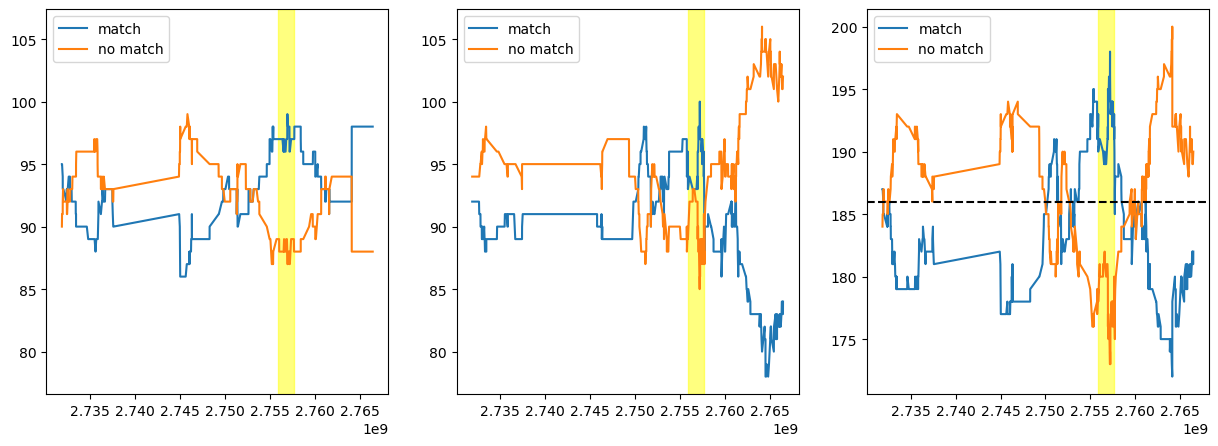

In [14]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
indices = np.where(-np.log10(z1) >= -np.log10(0.05))[0]
plt.plot(x1[indices[0]-200:indices[-1]+150], np.sum(z1_is_mat_match[:, indices[0]-200:indices[-1]+150]==1, axis=0), label='match')
plt.plot(x1[indices[0]-200:indices[-1]+150], np.sum(z1_is_mat_match[:, indices[0]-200:indices[-1]+150]==-1, axis=0), label='no match')
#plt.plot(np.sum(z1_is_mat_match[:, indices[0]-200:indices[-1]+100]==0, axis=0), label='missing')
plt.axvspan(x1[indices[0]], x1[indices[-1]], alpha=0.5, color='yellow')
plt.legend()

plt.subplot(1, 3, 2, sharex=ax, sharey=ax)
plt.plot(x1[indices[0]-200:indices[-1]+150], np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+150]==1, axis=0), label='match')
plt.plot(x1[indices[0]-200:indices[-1]+150], np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+150]==-1, axis=0), label='no match')
#plt.plot(np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+100]==0, axis=0), label='missing')
plt.axvspan(x1[indices[0]], x1[indices[-1]], alpha=0.5, color='yellow')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x1[indices[0]-200:indices[-1]+150], 
         np.sum(z1_is_mat_match[:, indices[0]-200:indices[-1]+150]==1, axis=0)+np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+150]==1, axis=0), label='match')
plt.plot(x1[indices[0]-200:indices[-1]+150], 
         np.sum(z1_is_mat_match[:, indices[0]-200:indices[-1]+150]==-1, axis=0)+np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+150]==-1, axis=0), label='no match')
#plt.plot(np.sum(z1_is_pat_match[:, indices[0]-200:indices[-1]+100]==0, axis=0), label='missing')
plt.axvspan(x1[indices[0]], x1[indices[-1]], alpha=0.5, color='yellow')
plt.axhline(z1_is_mat_match.shape[0], color='black', linestyle='--')
plt.legend()
plt.show()

In [17]:
print('nt-nt')
indices = np.where(-np.log10(z0) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms0[i], intervals0[0, i], intervals0[1, i], z0[i]) for i in indices]))

print('aut-nt')
indices = np.where(-np.log10(z1) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms1[i], intervals1[0, i], intervals1[1, i], z1[i]) for i in indices]))

print('aut-aut')
indices = np.where(-np.log10(z2) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms2[i], intervals2[0, i], intervals2[1, i], z2[i]) for i in indices]))

#print('all-all')
#indices = np.where(-np.log10(z3) >= -np.log10(0.05))[0]
#print('\n'.join(['%d:%d-%d\t%0.3f' % (chroms3[i], intervals3[0, i], intervals3[1, i], z3[i]) for i in indices]))


print('nt-nt mat')
indices = np.where(-np.log10(z0_mat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms0[i], intervals0[0, i], intervals0[1, i], z0_mat[i]) for i in indices]))

print('nt-nt pat')
indices = np.where(-np.log10(z0_pat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms0[i], intervals0[0, i], intervals0[1, i], z0_pat[i]) for i in indices]))

print('aut-nt mat')
indices = np.where(-np.log10(z1_mat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms1[i], intervals1[0, i], intervals1[1, i], z1_mat[i]) for i in indices]))

print('aut-nt pat')
indices = np.where(-np.log10(z1_pat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms1[i], intervals1[0, i], intervals1[1, i], z1_pat[i]) for i in indices]))

print('aut-aut mat')
indices = np.where(-np.log10(z2_mat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f\t%0.3f' % (chroms2[i], intervals2[0, i], intervals2[1, i], z2_mat[i], z2[i]) for i in indices]))

print('aut-aut pat')
indices = np.where(-np.log10(z2_pat) >= -np.log10(0.05))[0]
print('\n'.join(['%s:%d-%d\t%0.3f' % (chroms2[i], intervals2[0, i], intervals2[1, i], z2_pat[i]) for i in indices]))

#print('all-all mat')
#indices = np.where(-np.log10(z3_mat) >= -np.log10(0.05))[0]
#print('\n'.join(['%d:%d-%d\t%0.3f' % (chroms3[i], intervals3[0, i], intervals3[1, i], z3_mat[i]) for i in indices]))
#
#print('all-all pat')
#indices = np.where(-np.log10(z3_pat) >= -np.log10(0.05))[0]
#print('\n'.join(['%d:%d-%d\t%0.3f' % (chroms3[i], intervals3[0, i], intervals3[1, i], z3_pat[i]) for i in indices]))



nt-nt

aut-nt
20:42838309-42850444	0.045
20:43383167-43389420	0.044
20:43389420-43507129	0.025
20:43507129-43517630	0.019
20:43517630-43567451	0.017
20:43567451-43567911	0.009
20:43567911-43736096	0.008
20:43736096-43809177	0.009
20:43809177-43883827	0.017
20:43883827-43922048	0.017
20:43922048-43924057	0.019
20:43924057-43924238	0.019
20:43924238-43935009	0.025
20:43935009-43937938	0.027
20:43937938-43987874	0.044
20:43987874-43991954	0.044
20:43993829-44052431	0.045
20:44166513-44174122	0.045
20:44427511-44430799	0.044
20:44430799-44436015	0.045
20:44436015-44440357	0.045
20:44440357-44581196	0.044
20:44581196-44617910	0.027
20:44617910-44621951	0.044
20:44621951-44621952	0.027
20:44621952-44632055	0.044
20:44632055-44634716	0.045
aut-aut

nt-nt mat

nt-nt pat

aut-nt mat

aut-nt pat

aut-aut mat
19:3604269-3646645	0.023	0.558
19:3646645-3709068	0.020	0.544
19:3709068-3718439	0.023	0.558
aut-aut pat
7:4101620-4106985	0.018
7:4106985-4745023	0.016
7:4745023-4747462	0.018


In [ ]:
ibd1 = np.sum(z1_is_mat_match==1, axis=0)+np.sum(z1_is_pat_match==1, axis=0)
ibd1_mat = np.sum(z1_is_mat_match==1, axis=0)
ibd2_mat = np.sum(z2_is_mat_match==1, axis=0)
ibd2_pat = np.sum(z2_is_pat_match==1, axis=0)





In [ ]:
print(z2_mat[ibd2_mat==25])
print(z2_pat[ibd2_pat==25])

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.title('IBD among aut-aut sibpairs')
for chrom in range(1, 23):
    plt.plot(x2[chroms2==chrom], ibd2_mat[chroms2==chrom], 
                color=colors[2] if chrom%2==0 else colors[3])

plt.axhline(24, color='black', linestyle='--')
plt.xticks(offset[1:23].tolist(), [str(x) for x in range(1, 23)], rotation=90)
#plt.xlabel('Chromosome')
plt.ylabel('Maternal')
#plt.text(2185781480, 26, 'chr19:3604269-3718439')
plt.ylim([5, 30])

plt.subplot(2, 1, 2)
for chrom in range(1, 23):
    plt.plot(x2[chroms2==chrom], ibd2_pat[chroms2==chrom], 
                color=colors[2] if chrom%2==0 else colors[3])
plt.axhline(24, color='black', linestyle='--')
plt.xticks(offset[1:23].tolist(), [str(x) for x in range(1, 23)], rotation=90)
plt.xlabel('Chromosome')
plt.ylabel('Paternal')
#plt.text(2185781480, 26, 'chr19:3604269-3718439')
plt.ylim([5, 30])
    
plt.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(15, 5))

#plt.title('IBD among aut-aut sibpairs')
for chrom in range(1, 23):
    plt.plot(x2[chroms2==chrom], ibd2_mat[chroms2==chrom], 
                color=colors[2] if chrom%2==0 else colors[3])

#plt.axhline(24, color='black', linestyle='--')
plt.xticks(offset[1:23].tolist(), [str(x) for x in range(1, 23)], rotation=90)
plt.xlabel('Chromosome')
plt.ylabel('Sibpairs with IBD')
#plt.text(2185781480, 26, 'chr19:3604269-3718439')
plt.ylim([5, 30])
plt.show()

# Visualize permutations

In [ ]:
# pull phenotype data
sample_to_affected, sample_to_sex = dict(), dict()
with open('../../DATA/ancestry/ancestry.ped.quads.ped', 'r') as f:
	for line in f:
		pieces = line.strip().split('\t')
		sample_to_sex[pieces[1]] = pieces[4]
		sample_to_sex[pieces[3]] = '2'
		sample_to_sex[pieces[2]] = '1'
		sample_to_affected[pieces[1]] = pieces[5]

In [4]:
sibpairs = []
sibpair_keys = set()
with open('%s/sibpairs.json' % '../../PhasingFamilies/recomb_ancestry', 'r') as f:
	for sibpair in json.load(f):
		sib_key = (sibpair['sibling1'], sibpair['sibling2'])
		if sib_key not in sibpair_keys:
			sibpairs.append(sibpair)
			sibpair_keys.add(sib_key)
			sibpair_keys.add((sib_key[1], sib_key[0]))
            
for sibpair in sibpairs:
	sibpair['num_affected'] = int(sample_to_affected[sibpair['sibling1']]=='2') + int(sample_to_affected[sibpair['sibling2']]=='2')

sibpairs = [x for x in sibpairs if (x['num_affected']==2)]

print(len(sibpairs))

NameError: name 'sample_to_affected' is not defined

In [5]:
num_trials = 100

# take into account sibling structure across quads
individuals = sorted(set([x['sibling1'] for x in sibpairs] + [x['sibling2'] for x in sibpairs]))
ind_to_index = dict([(x, i) for i, x in enumerate(individuals)])
sibling1_indices = np.array([ind_to_index[x['sibling1']] for x in sibpairs])
sibling2_indices = np.array([ind_to_index[x['sibling2']] for x in sibpairs])

A = np.random.randint(0, high=2, size=(num_trials+1, len(individuals), 2))
X1 = (A[:, sibling1_indices, 0] == A[:, sibling2_indices, 0]).astype(int)
X2 = (A[:, sibling1_indices, 1] == A[:, sibling2_indices, 1]).astype(int)

# randomly flip IBD in sibpairs
#X1 = np.random.randint(0, high=2, size=(num_trials+1, len(sibpairs)))
#X2 = np.random.randint(0, high=2, size=(num_trials+1, len(sibpairs)))

X1[X1==0] = -1
X2[X2==0] = -1

# first entry is actual IBD relationships
X1[0, :] = 1
X2[0, :] = 1

print('ready')

# trial, interval, mat/pat
perm_is_mat_match = X1.dot(z2_is_mat_match)
print(perm_is_mat_match.shape)
perm_ibd_mat = perm_is_mat_match[4, :]/2 + (27/2)


ready


NameError: name 'z2_is_mat_match' is not defined

In [6]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(15, 5))

#plt.title('IBD among aut-aut sibpairs')
for chrom in range(1, 23):
    plt.plot(x2[chroms2==chrom], perm_ibd_mat[chroms2==chrom], 
                color=colors[2] if chrom%2==0 else colors[3])

#plt.axhline(24, color='black', linestyle='--')
plt.xticks(offset[1:23].tolist(), [str(x) for x in range(1, 23)], rotation=90)
plt.xlabel('Chromosome')
plt.ylabel('Sibpairs with permuted IBD')
#plt.text(2185781480, 26, 'chr19:3604269-3718439')
plt.ylim([5, 30])
plt.show()

NameError: name 'matplotlib' is not defined

In [7]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(15, 5))


for i in range(1, 29):
    perm_ibd_mat = np.flip(np.sort(perm_is_mat_match[i, :]/2 + (27/2)))
    plt.plot(perm_ibd_mat, color='gray', alpha=0.25)

perm_ibd_mat = np.flip(np.sort(perm_is_mat_match[0, :]/2 + (27/2)))
plt.plot(perm_ibd_mat, color=colors[3], label='observed IBD', linewidth=3)
plt.plot(perm_ibd_mat, color='gray', alpha=0.25, label='permuted IBD')    
   
plt.xticks([])
plt.ylim([5, 30])

#plt.xlim([0, 100])
#plt.ylim(15, 25)
plt.ylabel('Sibpairs with IBD')
plt.xlabel('Genomic regions ordered by IBD')
plt.legend()
    
plt.show()

NameError: name 'matplotlib' is not defined

In [8]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(7, 5))


for i in range(1, 100):
    perm_ibd_mat = np.flip(np.sort(perm_is_mat_match[i, :]/2 + (27/2)))
    plt.plot(perm_ibd_mat, color='gray', alpha=0.25)

perm_ibd_mat = np.flip(np.sort(perm_is_mat_match[0, :]/2 + (27/2)))
plt.plot(perm_ibd_mat, color=colors[3], label='observed IBD', linewidth=3)
plt.plot(perm_ibd_mat, color='gray', alpha=0.25, label='permuted IBD')    
   
plt.xticks([])
plt.ylim([5, 30])

plt.xlim([0, 100])
plt.ylim(15, 25)
plt.ylabel('Sibpairs with IBD')
plt.xlabel('Genomic regions ordered by IBD')
plt.legend()
    
plt.show()

NameError: name 'matplotlib' is not defined

# Check iHART

In [4]:
import scipy.sparse as sparse
import scipy.stats as stats

In [5]:
#start_pos, end_pos = 42752576, 44657537
#start_pos, end_pos = 42752576, 51012181
#start_pos, end_pos = 43733506, 43809177
#start_pos1, end_pos1 = 50984970, 51012181

#start_pos, end_pos = 3604269, 3718439
#start_pos, end_pos = 3630181, 3700477

chrom, start_pos, end_pos = '7', 4101620, 4747462
#chrom, start_pos, end_pos = '19', 3604269, 3718439

#PIP5K1C
#chrom, start_pos, end_pos = '19', 3630183, 3700468
gens = []
poss = []
is_rare = []
for i in range(20):
    try:
        coords = np.load('../../DATA/ihart.ms2/genotypes/chr.%s.%d.gen.coordinates.npy' % (chrom, i))
        af = np.load('../../DATA/ihart.ms2/genotypes/chr.%s.%d.gen.af.npy' % (chrom, i))

        is_in_interval = ((coords[:, 1]>=start_pos) & (coords[:, 1]<=end_pos))
        is_snp = (coords[:, 2]==1)
        is_pass = (coords[:, 3]==1)
        is_rare_variant = (af<=0.01)

        to_include = (is_in_interval & is_snp & is_pass)# & is_rare_variant)
        #to_include = (is_in_interval & is_snp & is_pass & is_rare_variant) | (is_in_interval & ~is_snp & is_pass)
        print(i, np.sum(to_include))
        if np.sum(to_include):
            gen = sparse.load_npz('../../DATA/ihart.ms2/genotypes/chr.%s.%d.gen.npz' % (chrom, i))[:, to_include]
            pos = coords[to_include, 1]

            gens.append(gen)
            poss.append(pos)
            is_rare.append(is_rare_variant[to_include])

            with open('../../DATA/ihart.ms2/genotypes/chr.%s.%d.gen.variants.vcf' % (chrom, i), 'r') as f, open('../../DATA/ihart.ms2/genotypes/chr.%s.%d.gen.variants.subset.vcf' % (chrom, i), 'w+') as outf:
                outf.write('#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\n')
                for line, include in zip(f, is_in_interval & is_snp & is_pass):
                    if include:
                        outf.write(line)
    except:
        pass
                
print([gen.A.shape for gen in gens])
gen = np.hstack([gen.A for gen in gens])
pos = np.hstack(poss)
is_rare = np.hstack(is_rare)
print(gen.shape, pos.shape)


0 20677
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
[(4610, 20677)]
(4610, 20677) (20677,)


In [6]:
with open('../../DATA/ihart.ms2/genotypes/samples.json', 'r') as f:
    samples = json.load(f)
    sample_to_index = dict([(x, i) for i, x in enumerate(samples)])

trios = []
is_aut = []
with open('../../DATA/ihart.ms2/ihart.ped', 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        fam_id, child_id, f_id, m_id = pieces[0:4]
        phen = pieces[5]
        if f_id in sample_to_index and m_id in sample_to_index and child_id in sample_to_index:
            trios.append([sample_to_index[m_id], sample_to_index[f_id], sample_to_index[child_id]])
            is_aut.append(phen=='2')
trios = np.array(trios)
is_aut = np.array(is_aut)
print(trios.shape)

(2293, 3)


In [7]:
gen_trios = gen[trios, :]


In [8]:
mat_aut_trans = np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==0) & (gen_trios[is_aut, 2, :]==1))
mat_aut_trans += np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==2))

mat_aut_notrans = np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==0) & (gen_trios[is_aut, 2, :]==0))
mat_aut_notrans += np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==0))

pat_aut_trans = np.sum((gen_trios[is_aut, 0, :]==0) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==1))
pat_aut_trans += np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==2))

pat_aut_notrans = np.sum((gen_trios[is_aut, 0, :]==0) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==0))
pat_aut_notrans += np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==0))

unknown_aut_trans = np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==1))
unknown_aut_notrans = np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==1))

mat_nt_trans = np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==0) & (gen_trios[~is_aut, 2, :]==1))
mat_nt_trans += np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==2))

mat_nt_notrans = np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==0) & (gen_trios[~is_aut, 2, :]==0))
mat_nt_notrans += np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==0))

pat_nt_trans = np.sum((gen_trios[~is_aut, 0, :]==0) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==1))
pat_nt_trans += np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==2))

pat_nt_notrans = np.sum((gen_trios[~is_aut, 0, :]==0) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==0))
pat_nt_notrans += np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==0))

unknown_nt_trans = np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==1))
unknown_nt_notrans = np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==1))

print('mat', stats.chi2_contingency([[mat_aut_trans, mat_aut_notrans], [mat_nt_trans, mat_nt_notrans]]))
print(mat_aut_trans/(mat_aut_trans+mat_aut_notrans), mat_nt_trans/(mat_nt_trans+mat_nt_notrans))
print('pat', stats.chi2_contingency([[pat_aut_trans, pat_aut_notrans], [pat_nt_trans, pat_nt_notrans]]))
print(pat_aut_trans/(pat_aut_trans+pat_aut_notrans), pat_nt_trans/(pat_nt_trans+pat_nt_notrans))

aut_trans = mat_aut_trans+pat_aut_trans+unknown_aut_trans
aut_notrans = mat_aut_notrans+pat_aut_notrans+unknown_aut_notrans
nt_trans = mat_nt_trans+pat_nt_trans+unknown_nt_trans
nt_notrans = mat_nt_notrans+pat_nt_notrans+unknown_nt_notrans

print(stats.chi2_contingency([[aut_trans, aut_notrans], [nt_trans, nt_notrans]]))
print(aut_trans/(aut_trans+aut_notrans), 
     nt_trans/(nt_trans+nt_notrans))


mat (86.64988796062019, 1.2953791065117368e-20, 1, array([[442687.69664087, 447252.30335913],
       [ 94208.30335913,  95179.69664087]]))
0.495368227071488 0.5071493442034343
pat (7.85301548426234, 0.0050736012327894445, 1, array([[436498.01865862, 432859.98134138],
       [ 95500.98134138,  94705.01865862]]))
0.5014550967495555 0.5050050997339727
(58.16356150235717, 2.4120566323508892e-14, 1, array([[1110986.51920744, 1111891.48079256],
       [ 241896.48079256,  242093.51920744]]))
0.49871472928338845 0.5047645612512656


In [9]:
# 1   9.330244032995598e-56      0.5000123768503392 0.46281985856965807
# 0.1   1.0100271076786687e-50      0.4996886979569692 0.4629057946791985
# 0.01    2.0354550636415403e-47   0.5001112968690059 0.4634738052912266
# 0.001   1.195681689470755e-34    0.49979127720202554 0.4646004661005599
# 0.0001   4.044962169638704e-30   0.4987336523988499 0.45885167464114834

In [10]:
trans_mat_aut = np.sum((gen_trios[is_aut, 0, :]==1) & (gen_trios[is_aut, 1, :]==0) & (gen_trios[is_aut, 2, :]==1))
trans_pat_aut = np.sum((gen_trios[is_aut, 0, :]==0) & (gen_trios[is_aut, 1, :]==1) & (gen_trios[is_aut, 2, :]==1))

trans_mat_nt = np.sum((gen_trios[~is_aut, 0, :]==1) & (gen_trios[~is_aut, 1, :]==0) & (gen_trios[~is_aut, 2, :]==1))
trans_pat_nt = np.sum((gen_trios[~is_aut, 0, :]==0) & (gen_trios[~is_aut, 1, :]==1) & (gen_trios[~is_aut, 2, :]==1))


print(trans_mat_aut, trans_pat_aut)
print(trans_mat_nt, trans_pat_nt)

321392 316488
69722 69729


In [11]:
print(mat_aut_trans, mat_aut_notrans)
print(pat_aut_trans, pat_aut_notrans)

440848 449092
435944 433414


In [12]:
print(mat_nt_trans, mat_nt_notrans)
print(pat_nt_trans, pat_nt_notrans)

96048 93340
96055 94151


In [13]:
cons_to_pos = defaultdict(list)
gens_to_pos = defaultdict(list)
pos_to_snp = dict()

if chrom=='19':
    #with open('../data/chr.19.0.gen.variants.subset_SIFTannotations.txt', 'r') as f:
    #    header = next(f).strip().split('\t')
    #    for line in f:
    #        pieces = line.strip().split('\t')
    #        pos_to_pred[int(pieces[header.index('POS')])] = pieces[header.index('SIFT_PREDICTION')]
    
    with open('../data/chr19_VEP.txt', 'r') as f:
        header = next(f).strip().split('\t')
        for line in f:
            pieces = line.strip().split('\t')
            sift = pieces[header.index('SIFT')]
            polyphen = pieces[header.index('PolyPhen')]
            p = int(pieces[1].split('-')[-1])
            for cons in pieces[header.index('Consequence')].split(','):
                cons_to_pos[cons].append(p)
            if ('deleterious' in sift) or ('probably' in polyphen):
                cons_to_pos['DELETERIOUS'].append(p)
            if pieces[header.index('Existing_variation')] != '-':
                pos_to_snp[p] = pieces[header.index('Existing_variation')]

#print(len(pos_to_pred))
# non_coding_transcript_exon_variant

if chrom=='7':
    #with open('../data/chr.7.0.gen.variants.subset_SIFTannotations.txt', 'r') as f:
    #    header = next(f).strip().split('\t')
    #    for line in f:
    #        pieces = line.strip().split('\t')
    #        pos_to_pred[int(pieces[header.index('POS')])] = pieces[header.index('SIFT_PREDICTION')]
    
    with open('../data/chr7_VEP.txt', 'r') as f:
        header = next(f).strip().split('\t')
        for line in f:
            pieces = line.strip().split('\t')
            sift = pieces[header.index('SIFT')]
            polyphen = pieces[header.index('PolyPhen')]
            gene = pieces[header.index('SYMBOL')]
            p = int(pieces[1].split('-')[-1])
            for cons in pieces[header.index('Consequence')].split(','):
                cons_to_pos[cons].append(p)
            if ('deleterious' in sift) or ('probably' in polyphen):
                cons_to_pos['DELETERIOUS'].append(p)
            gens_to_pos[gene].append(p)
            if pieces[header.index('Existing_variation')] != '-':
                pos_to_snp[p] = pieces[header.index('Existing_variation')]
cons_to_pos['rare'] = list(pos[is_rare])

print(','.join(['%s: %d' % (k, len(v)) for k, v in cons_to_pos.items()]))



intron_variant: 19770,regulatory_region_variant: 2911,TF_binding_site_variant: 515,missense_variant: 140,DELETERIOUS: 77,synonymous_variant: 134,splice_polypyrimidine_tract_variant: 48,splice_region_variant: 30,upstream_gene_variant: 1605,downstream_gene_variant: 1782,non_coding_transcript_exon_variant: 360,non_coding_transcript_variant: 6391,splice_donor_variant: 3,splice_acceptor_variant: 4,3_prime_UTR_variant: 152,intergenic_variant: 11858,coding_sequence_variant: 1,rare: 16766


In [14]:
options = ['rare',
           'splice_region_variant', 'missense_variant', 'TF_binding_site_variant', '3_prime_UTR_variant',
           #'NMD_transcript_variant', 'missense_variant', 'splice_region_variant', 'splice_polypyrimidine_tract_variant', 'splice_donor_region_variant', 'downstream_gene_variant', 'intron_variant', 'non_coding_transcript_exon_variant', 'stop_gained', 'splice_donor_5th_base_variant', 'regulatory_region_variant', 'synonymous_variant', 'non_coding_transcript_variant', '3_prime_UTR_variant', '5_prime_UTR_variant', 'TF_binding_site_variant', 'upstream_gene_variant',
          'DELETERIOUS']
pvalues = np.ones((len(options), 2))
aut_trans = np.zeros((len(options), 2))
aut_notrans = np.zeros((len(options), 2))
nt_trans = np.zeros((len(options), 2))
nt_notrans = np.zeros((len(options), 2))

pos_to_index = dict([(x, i) for i, x in enumerate(pos)])

for j, opt in enumerate(options):
    for p in cons_to_pos[opt]:
        i = pos_to_index[p]

        is_mat_trans = ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==0) & (gen_trios[:, 2, i]==1)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==2) & (gen_trios[:, 2, i]==2))

        is_mat_notrans = ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==0) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==2) & (gen_trios[:, 2, i]==1))

        is_pat_trans = ((gen_trios[:, 0, i]==0) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2)) \
                     | ((gen_trios[:, 0, i]==2) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2))

        is_pat_notrans = ((gen_trios[:, 0, i]==0) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==2) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1))

        is_unk_trans = (gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)
        is_unk_notrans = (gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)

        aut_trans[j, 0] += np.sum(is_mat_trans[is_aut])
        aut_notrans[j, 0] += np.sum(is_mat_notrans[is_aut])
        nt_trans[j, 0] += np.sum(is_mat_trans[~is_aut])
        nt_notrans[j, 0] += np.sum(is_mat_notrans[~is_aut])
        
        aut_trans[j, 1] += np.sum(is_pat_trans[is_aut])
        aut_notrans[j, 1] += np.sum(is_pat_notrans[is_aut])
        nt_trans[j, 1] += np.sum(is_pat_trans[~is_aut])
        nt_notrans[j, 1] += np.sum(is_pat_notrans[~is_aut])

    pvalues[j, 0] = stats.chi2_contingency([[aut_trans[j, 0], aut_notrans[j, 0]],
                                         [nt_trans[j, 0], nt_notrans[j, 0]]])[1]
    pvalues[j, 1] = stats.chi2_contingency([[aut_trans[j, 1], aut_notrans[j, 1]],
                                         [nt_trans[j, 1], nt_notrans[j, 1]]])[1]
    


In [15]:
aut_p = aut_trans/(aut_trans+aut_notrans)
nt_p = nt_trans/(nt_trans+nt_notrans)
aut_lb_mat, aut_ub_mat = sm.stats.proportion_confint(aut_trans[:, 0], aut_trans[:, 0]+aut_notrans[:, 0], alpha=0.05, method='agresti_coull')
nt_lb_mat, nt_ub_mat = sm.stats.proportion_confint(nt_trans[:, 0], nt_trans[:, 0]+nt_notrans[:, 0], alpha=0.05, method='agresti_coull')

aut_lb_pat, aut_ub_pat = sm.stats.proportion_confint(aut_trans[:, 1], aut_trans[:, 1]+aut_notrans[:, 1], alpha=0.05, method='agresti_coull')
nt_lb_pat, nt_ub_pat = sm.stats.proportion_confint(nt_trans[:, 1], nt_trans[:, 1]+nt_notrans[:, 1], alpha=0.05, method='agresti_coull')

print(aut_trans+aut_notrans)
print(nt_trans+nt_notrans)
print(pvalues[:, 1]*6)

[[43112. 44893.]
 [  300.   399.]
 [ 1426.  1402.]
 [28803. 28037.]
 [ 8484.  7793.]
 [  112.   128.]]
[[ 9044. 10000.]
 [   64.    83.]
 [  333.   340.]
 [ 6423.  6066.]
 [ 1821.  1732.]
 [   29.    25.]]
[3.85492926e-02 5.69291321e-10 3.48201195e+00 5.03315157e-01
 2.29676725e+00 1.87921733e+00]


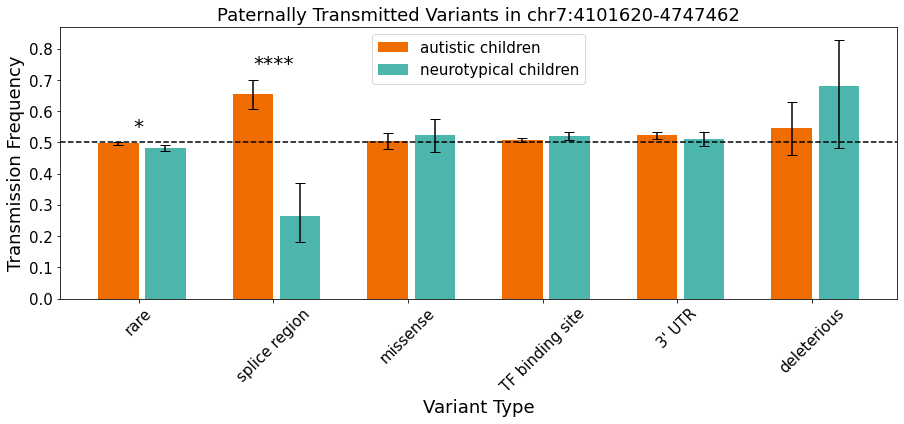

In [22]:
plt.figure(figsize=(15, 5))

#plt.suptitle('Variant transmission in chr7:4101620-4747462')

#ax = plt.subplot(1, 2, 1)
#plt.bar(np.arange(len(options)), aut_p[:, 0], 0.3, label='autistic children', color=colors[2])
#plt.errorbar(np.arange(len(options)), aut_p[:, 0], yerr=np.vstack((aut_p[:, 0]-aut_lb_mat, aut_ub_mat-aut_p[:, 0])), 
#             color='black', linestyle='', capsize=5)
#plt.bar(np.arange(len(options))+0.35, nt_p[:, 0], 0.3, label='neurotypical children', color=colors[3])
#plt.errorbar(np.arange(len(options))+0.35, nt_p[:, 0], yerr=np.vstack((nt_p[:, 0]-nt_lb_mat, nt_ub_mat-nt_p[:, 0])), 
#             color='black', linestyle='', capsize=5)
#plt.axhline(0.5, color='black', linestyle='--')
#plt.xticks(np.arange(len(options))+0.15, ['rare', 'splice region',  'missense', 'TF binding site', "3' UTR", 'deleterious'], rotation=45)
#plt.xlabel('Variant Type')
#plt.text(5.15, 0.95, '*', fontsize=20, ha='center', va='center')
#plt.ylabel('Transmission Frequency')
#plt.legend()
#plt.title('Maternally Transmitted Variants')
#plt.yticks(np.arange(0, 1.2, 0.2))
#plt.ylim([0, 1])


#plt.subplot(1, 2, 2, sharey=ax)
plt.bar(np.arange(len(options)), aut_p[:, 1], 0.3, label='autistic children', color=colors[2])
plt.errorbar(np.arange(len(options)), aut_p[:, 1], yerr=np.vstack((aut_p[:, 1]-aut_lb_pat, aut_ub_pat-aut_p[:, 1])), 
             color='black', linestyle='', capsize=5)
plt.bar(np.arange(len(options))+0.35, nt_p[:, 1], 0.3, label='neurotypical children', color=colors[3])
plt.errorbar(np.arange(len(options))+0.35, nt_p[:, 1], yerr=np.vstack((nt_p[:, 1]-nt_lb_pat, nt_ub_pat-nt_p[:, 1])), 
             color='black', linestyle='', capsize=5)
plt.axhline(0.5, color='black', linestyle='--')
plt.xticks(np.arange(len(options))+0.15, ['rare', 'splice region',  'missense', 'TF binding site', "3' UTR", 'deleterious'], rotation=45, fontsize=15)
plt.xlabel('Variant Type', fontsize=18)
plt.text(1.15, 0.75, '****', fontsize=20, ha='center', va='center')
plt.text(0.15, 0.55, '*', fontsize=20, ha='center', va='center')
plt.ylabel('Transmission Frequency', fontsize=18)
plt.yticks(fontsize=15)

plt.title('Paternally Transmitted Variants in chr7:4101620-4747462', fontsize=18)
plt.legend(fontsize=15)
plt.savefig('../plots/ihart_variants.png', bbox_inches='tight')

#plt.show()


In [23]:
print('\n'.join([pos_to_snp[p].split(',')[0] for p in cons_to_pos['splice_region_variant'] if p in pos_to_snp]))



rs1584180546
rs1584180546
rs368261349
rs368261349
rs368261349
rs201486360
rs201486360
rs201486360
rs369785109
rs369785109
rs369785109
rs112491467
rs112491467
rs112491467
rs368381587
rs368381587
rs368381587
rs74801612
rs375715373
rs375715373
rs375715373
rs375715373
rs149321114
rs149321114
rs149321114
rs149321114
rs28528203


In [24]:
gen_options = sorted(gens_to_pos.keys())
print(gen_options)
pvalues_gen = np.ones((len(gen_options),))
aut_trans_gen = np.zeros((len(gen_options),))
aut_notrans_gen = np.zeros((len(gen_options),))
nt_trans_gen = np.zeros((len(gen_options),))
nt_notrans_gen = np.zeros((len(gen_options),))

for j, gen in enumerate(gen_options):
    for p in set(cons_to_pos['splice_region_variant']) & set(gens_to_pos[gen]):
        i = pos_to_index[p]

        is_mat_trans = ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==0) & (gen_trios[:, 2, i]==1)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==2) & (gen_trios[:, 2, i]==2))

        is_mat_notrans = ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==0) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==2) & (gen_trios[:, 2, i]==1))

        is_pat_trans = ((gen_trios[:, 0, i]==0) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2)) \
                     | ((gen_trios[:, 0, i]==2) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==2))

        is_pat_notrans = ((gen_trios[:, 0, i]==0) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==0)) \
                     | ((gen_trios[:, 0, i]==2) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1))

        is_unk_trans = (gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)
        is_unk_notrans = (gen_trios[:, 0, i]==1) & (gen_trios[:, 1, i]==1) & (gen_trios[:, 2, i]==1)

        aut_trans_gen[j] += np.sum(is_pat_trans[is_aut])
        aut_notrans_gen[j] += np.sum(is_pat_notrans[is_aut])
        nt_trans_gen[j] += np.sum(is_pat_trans[~is_aut])
        nt_notrans_gen[j] += np.sum(is_pat_notrans[~is_aut])

    print(gen, aut_trans_gen[j], aut_notrans_gen[j], nt_trans_gen[j], nt_notrans_gen[j])
    try:
        pvalues_gen[j] = stats.chi2_contingency([[aut_trans_gen[j], aut_notrans_gen[j]],
                                         [nt_trans_gen[j], nt_notrans_gen[j]]])[1]
    except:
        pass
    


['-', 'CYP3A54P', 'FOXK1', 'SDK1']
- 18.0 6.0 1.0 4.0
CYP3A54P 0.0 0.0 0.0 0.0
FOXK1 2.0 0.0 1.0 0.0
SDK1 86.0 45.0 7.0 19.0


//anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:108: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [25]:
print(len(set(cons_to_pos['splice_region_variant']) & set(gens_to_pos['SDK1']))/len(set(cons_to_pos['splice_region_variant'])))

0.9090909090909091


In [26]:
aut_p_gen = aut_trans_gen/(aut_trans_gen+aut_notrans_gen)
nt_p_gen = nt_trans_gen/(nt_trans_gen+nt_notrans_gen)
aut_lb_gen, aut_ub_gen = sm.stats.proportion_confint(aut_trans_gen, aut_trans_gen+aut_notrans_gen, alpha=0.05, method='agresti_coull')
nt_lb_gen, nt_ub_gen = sm.stats.proportion_confint(nt_trans_gen, nt_trans_gen+nt_notrans_gen, alpha=0.05, method='agresti_coull')


print(aut_lb_gen, aut_ub_gen)
print(aut_p_gen)
print(nt_lb_gen, nt_ub_gen)
print(nt_p_gen)
print(aut_trans_gen+aut_notrans_gen)
print(nt_trans_gen+nt_notrans_gen)
print(pvalues_gen)

[5.47917023e-01 5.55111512e-17 2.90227252e-01 5.71633189e-01] [0.88309487 1.         1.         0.7324276 ]
[0.75              nan 1.         0.65648855]
[2.03206313e-02 5.55111512e-17 1.67499485e-01 1.34686978e-01] [0.64036885 1.         1.         0.46318791]
[0.2               nan 1.         0.26923077]
[ 24.   0.   2. 131.]
[ 5.  0.  1. 26.]
[6.62538339e-02            nan 1.00000000e+00 5.56086796e-04]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:90: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


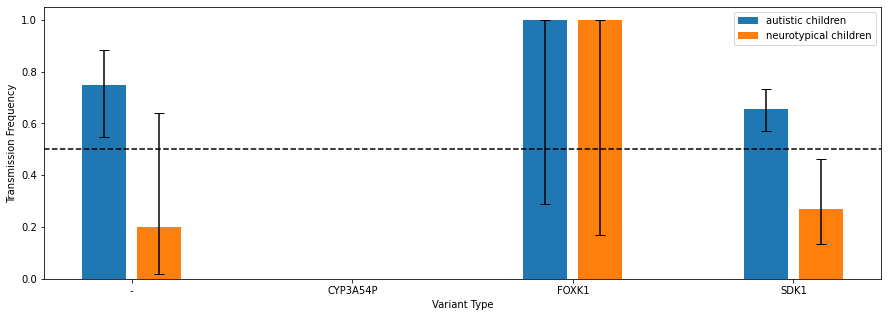

In [27]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(gen_options)), aut_p_gen, 0.2, label='autistic children')
plt.errorbar(np.arange(len(gen_options)), aut_p_gen, yerr=np.vstack((aut_p_gen-aut_lb_gen, aut_ub_gen-aut_p_gen)), 
             color='black', linestyle='', capsize=5)
plt.bar(np.arange(len(gen_options))+0.25, nt_p_gen, 0.2, label='neurotypical children')
plt.errorbar(np.arange(len(gen_options))+0.25, nt_p_gen, yerr=np.vstack((nt_p_gen-nt_lb_gen, nt_ub_gen-nt_p_gen)), 
             color='black', linestyle='', capsize=5)
plt.axhline(0.5, color='black', linestyle='--')
plt.xticks(np.arange(len(gen_options))+0.125, gen_options)
plt.xlabel('Variant Type')
plt.ylabel('Transmission Frequency')
plt.legend()
plt.show()


# Look at intersection

In [28]:
chrom1, start_pos1, end_pos1 = '7', 4101620, 4747462
chrom2, start_pos2, end_pos2 = '19', 3604269, 3718439
na = 2

is_pat_match1 = np.load('../permutation_tests/spark.chr%s.%d-%d.%d.is_pat_match.npy' % (chrom1, start_pos1, end_pos1, na))
intervals1 = np.load('../permutation_tests/spark.chr%s.%d-%d.%d.intervals.npy' % (chrom1, start_pos1, end_pos1, na))
is_mat_match2 = np.load('../permutation_tests/spark.chr%s.%d-%d.%d.is_mat_match.npy' % (chrom2, start_pos2, end_pos2, na))
intervals2 = np.load('../permutation_tests/spark.chr%s.%d-%d.%d.intervals.npy' % (chrom2, start_pos2, end_pos2, na))


In [29]:
print(intervals1.shape, is_pat_match1.shape)

(2, 113) (1466, 113)


In [30]:
interval_lengths1 = intervals1[1, :] - intervals1[0, :]
is_pat_ibd = is_pat_match1.dot(interval_lengths1)>0
print(np.sum(is_pat_ibd), np.sum(~is_pat_ibd))

interval_lengths2 = intervals2[1, :] - intervals2[0, :]
is_mat_ibd = is_mat_match2.dot(interval_lengths2)>0
print(np.sum(is_mat_ibd), np.sum(~is_mat_ibd))

749 717
761 705


In [31]:
print(np.sum(is_mat_ibd & is_pat_ibd), np.sum(is_mat_ibd & ~is_pat_ibd),
      np.sum(~is_mat_ibd & is_pat_ibd), np.sum(~is_mat_ibd & ~is_pat_ibd))

410 351 339 366


In [32]:
print(stats.binom_test(np.sum(is_mat_ibd & is_pat_ibd), len(is_mat_ibd), p=0.25))

0.009475788186740199
